In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
import pandas as pd
import pickle
import numpy as np

In [94]:
import matplotlib
matplotlib.rcParams.update({"font.size": 12})
matplotlib.rcParams["lines.linewidth"] = 2
matplotlib.rcParams["legend.fontsize"] = 13

In [2]:
lr = pd.read_csv("./stats/run_lr.csv")

In [3]:
psnr_tr = pd.read_csv("./stats/run_psnr_train.csv")

In [4]:
psnr_tr

,Wall time,Step,Value
0,1.638097e+09,0,41.139782
1,1.638098e+09,1,41.079063
2,1.638098e+09,2,41.734150
3,1.638099e+09,3,42.287098
4,1.638099e+09,4,42.410545
...,...,...,...
245,1.638255e+09,245,43.829960
246,1.638255e+09,246,43.826599
247,1.638256e+09,247,43.827690
248,1.638256e+09,248,43.829533


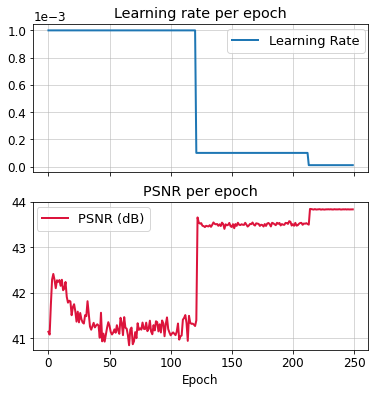

In [117]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

ax1.plot(lr["Step"], lr["Value"], label="Learning Rate")
ax1.set_title('Learning rate per epoch')
#ax1.set_ylabel('Learning Rate')
ax1.legend(
    loc="upper right",
    bbox_to_anchor=(-0.01, 0.86, 1.0, 0.102),
    ncol=5,
    borderaxespad=0.0,
)
ax1.grid(linewidth=0.5)
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2.plot(psnr_tr["Step"], psnr_tr["Value"], color='crimson', label="PSNR (dB)")
ax2.set_title('PSNR per epoch')
ax2.set_xlabel('Epoch')
#ax2.set_ylabel('PSNR (dB)')
ax2.legend(
    loc="upper left",
    bbox_to_anchor=(0.01, 0.86, 1.0, 0.102),
    ncol=5,
    borderaxespad=0.0,
)
ax2.grid(linewidth=0.5)
ax2.set_yticks(np.arange(int(min(psnr_tr["Value"])), max(psnr_tr["Value"])+1, 1.0))
ax2.set_ylim(min(psnr_tr["Value"])-0.1)

fig.savefig("./imgs/learning_rate.pdf", bbox_inches = 'tight', pad_inches = 0)

In [78]:
with open('stats/saved_models/prnu_results', 'rb') as model_file:
    try:
        prnu_result = pickle.load(model_file)
    except:
        exit('The loaded object is not a MemoryTree')

In [79]:
cc = prnu_result['cc']
pce = prnu_result['pce']

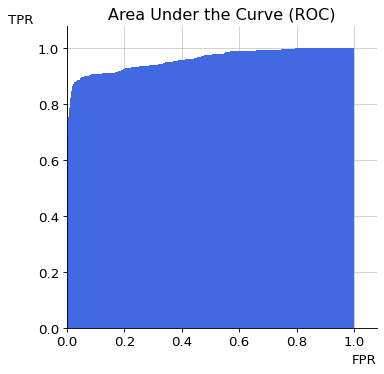

In [142]:
fig, ax = plt.subplots(figsize=(5,5),dpi=80)
ax.fill(np.insert(cc['fpr'],cc['fpr'].size,1.0), np.insert(cc['tpr'],cc['tpr'].size,0.0), 'royalblue')

ax.set_title('Area Under the Curve (ROC)')
ax.set_xlabel('FPR', loc='right')
ax.set_ylabel('TPR', loc='top', rotation=0)
ax.set(xlim=(0.0,1.08), ylim=(0.0,1.08))

# set the x-spine
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

ax.grid(linewidth=0.5)
ax.set_axisbelow(True)

fig.savefig("./imgs/roc.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()